<a href="https://colab.research.google.com/github/abdipourasl/Deep-Learning-1402/blob/main/DL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Deep Learning Project #4<h1>
Amin Abdipour 401133011</h1>
</div>

#  ***Question 2.1***

## CNN without Dropout, 50 epoch

### Importing Libraries

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import cv2
drive.mount('/content/gdrive')
# from google.colab.patches import cv2_imshow
# from PIL import Image
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
from sklearn.metrics import accuracy_score, confusion_matrix


Mounted at /content/gdrive


### 1. Import  Data

Define transformations to apply to the data


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Load CIFAR-10 train and test datasets


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 52436091.47it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 2. Create data loaders

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

### 3. Define CNN Model

In [5]:
def deep_cnn():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    return model

### 6. Define Optimizer & Loss function

In [6]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=10, bias=True)
)

### 7. Train Model

In [7]:
# Training the model
for epoch in range(50):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 19964.168909
Epoch: 2 	Training Loss: 13682.134972
Epoch: 3 	Training Loss: 11164.723561
Epoch: 4 	Training Loss: 9647.014526
Epoch: 5 	Training Loss: 8530.127198
Epoch: 6 	Training Loss: 7607.021602
Epoch: 7 	Training Loss: 6793.248763
Epoch: 8 	Training Loss: 6140.763022
Epoch: 9 	Training Loss: 5602.320337
Epoch: 10 	Training Loss: 5104.096681
Epoch: 11 	Training Loss: 4720.837495
Epoch: 12 	Training Loss: 4407.539765
Epoch: 13 	Training Loss: 4075.583725
Epoch: 14 	Training Loss: 3899.672740
Epoch: 15 	Training Loss: 3876.764288
Epoch: 16 	Training Loss: 3676.171203
Epoch: 17 	Training Loss: 3579.977373
Epoch: 18 	Training Loss: 3526.021268
Epoch: 19 	Training Loss: 3479.214199
Epoch: 20 	Training Loss: 3498.423759
Epoch: 21 	Training Loss: 3364.046382
Epoch: 22 	Training Loss: 3353.964712
Epoch: 23 	Training Loss: 3372.760815
Epoch: 24 	Training Loss: 3349.914372
Epoch: 25 	Training Loss: 3500.108350
Epoch: 26 	Training Loss: 3528.141326
Epoch: 27 	Trainin

KeyboardInterrupt: ignored

In [8]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 37, Training Accuracy: 91.52%


### 8. Test Model

In [9]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')



Test Accuracy: 68.29%


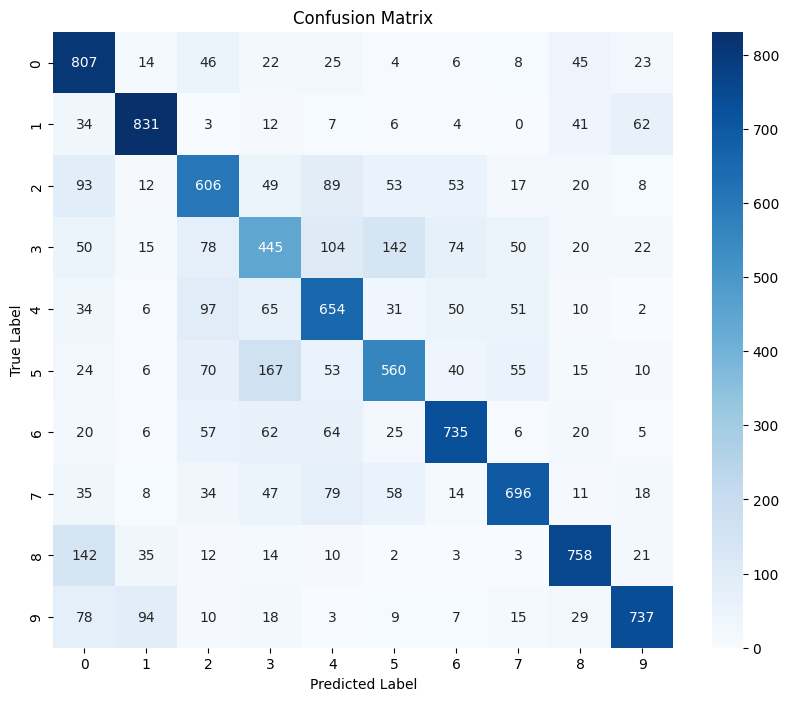

In [10]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Save Model

In [11]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

## Change Model

### 9. with 25 epoch

In [ ]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

In [ ]:
# Training the model
for epoch in range(25):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_25epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

### 10. with 15 epoch

In [ ]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_15epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

### 11. input layer of classification = 512

In [ ]:
def deep_cnn2():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
    return model

In [ ]:
model = deep_cnn2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_without_dropout_512.pth'
torch.save(model.state_dict(), model_path)

### 12. with dropout 50%

In [17]:
def deep_cnn2():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 512),
        nn.ReLU(),
        nn.Dropout(0.5),  # Add dropout with 50% probability
        nn.Linear(512, 10)
    )
    return model

In [18]:
model = deep_cnn2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=512, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=512, out_features=10, bias=True)
)

In [19]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 20639.854836
Epoch: 2 	Training Loss: 14713.605721
Epoch: 3 	Training Loss: 12301.898270
Epoch: 4 	Training Loss: 10922.891245
Epoch: 5 	Training Loss: 9936.965084
Epoch: 6 	Training Loss: 9080.225837
Epoch: 7 	Training Loss: 8397.256610
Epoch: 8 	Training Loss: 7891.594561
Epoch: 9 	Training Loss: 7411.206796
Epoch: 10 	Training Loss: 7053.637555
Epoch: 11 	Training Loss: 6625.879162
Epoch: 12 	Training Loss: 6368.503220
Epoch: 13 	Training Loss: 6080.996561
Epoch: 14 	Training Loss: 5899.492714
Epoch: 15 	Training Loss: 5654.012093


In [20]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 84.17%


In [21]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

Test Accuracy: 73.78%


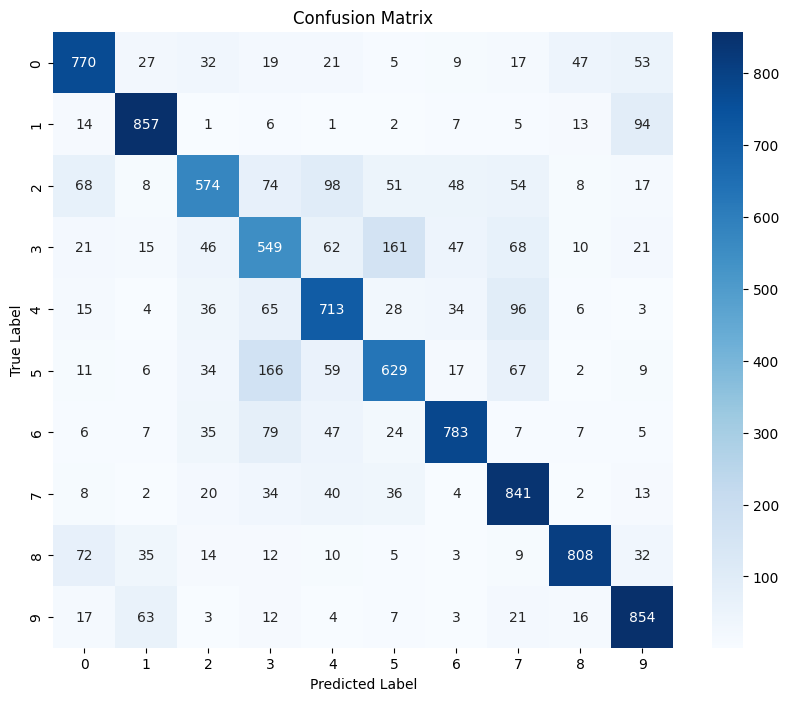

In [22]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_with_dropout50_512.pth'
torch.save(model.state_dict(), model_path)

#  ***Question 2.2 : CNN with Residual Connections***

### 1. Define Residual Block

In [11]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out


### 2. Define Model

In [12]:
class ResidualCNN(nn.Module):
    def __init__(self):
        super(ResidualCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.residual_block1 = ResidualBlock(16, 32, stride=2)
        self.residual_block2 = ResidualBlock(32, 64, stride=2)
        self.residual_block3 = ResidualBlock(64, 128, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.residual_block1(x)
        x = self.residual_block2(x)
        x = self.residual_block3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


### 3. Define Optimizer & Loss function

In [13]:
model = ResidualCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 4. Train Model

In [14]:
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))

Epoch: 1 	Training Loss: 17364.694161
Epoch: 2 	Training Loss: 11816.627591
Epoch: 3 	Training Loss: 9021.809298
Epoch: 4 	Training Loss: 7062.509068
Epoch: 5 	Training Loss: 5543.424066
Epoch: 6 	Training Loss: 4199.624812
Epoch: 7 	Training Loss: 3079.668074
Epoch: 8 	Training Loss: 2304.722498
Epoch: 9 	Training Loss: 1702.893677
Epoch: 10 	Training Loss: 1333.660399


In [15]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 10, Training Accuracy: 96.29%


### 4. Test Model

In [16]:
# Validation/Test accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print('Epoch {}, Test Accuracy: {:.2f}%'.format(epoch + 1, test_accuracy))


Epoch 10, Test Accuracy: 75.26%


#  ***Question 3.1***

### 1. load model

In [24]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_with_dropout50_512.pth'
loadmodel = torch.load(model_path)

### 2. Modify the last layer for STL-10


In [25]:
num_classes_stl10 = 10
model.fc = nn.Linear(model.fc.in_features, num_classes_stl10)

AttributeError: ignored

### 3. DataLoader for STL-10


In [ ]:
transform_stl10 = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to match CIFAR-10 size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

stl10_dataset = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform_stl10)
stl10_loader = torch.utils.data.DataLoader(stl10_dataset, batch_size=4, shuffle=False, num_workers=2)


### 4. Test STL-10 with Model


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in stl10_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')


In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  ***Question 3.2***

### 1. load model

In [ ]:
model = torchvision.models.inception_v3(pretrained=True)
model.eval()


### 2. Modify the last layer for STL-10


In [ ]:
num_classes_stl10 = 10
model.fc = nn.Linear(model.fc.in_features, num_classes_stl10)

AttributeError: ignored

### 3. DataLoader for STL-10


In [ ]:
transform_stl10 = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize images to match Inception v3 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
stl10_dataset = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform_stl10)
stl10_loader = torch.utils.data.DataLoader(stl10_dataset, batch_size=4, shuffle=False, num_workers=2)


### 4. Test STL-10 with Model


In [ ]:
all_preds = []
all_labels = []

with torch.no_grad():
    for data in stl10_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
conf_mat = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for STL-10 using Inception v3')
plt.show()

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()